In [1]:
%matplotlib inline
from datatypes import ImageTraining as it
from models import Models, CNN_models
from DataProcessing import transformations, ImageGenerator
import numpy as np
from misc import utils
import os
import cv2
from collections import Counter
from matplotlib import pyplot as plt
import models.pretrained as pt
import visualization.ModelHistoryPlot as mplot

Using TensorFlow backend.


In [2]:
file_prefix = '/Users/niquo/Documents/SUMMER17/makerere_projects/image_training/data/Severities_Final/'

cbb_files = [file_prefix + 'cbb-levels/cbb_2/',
            file_prefix + 'cbb-levels/cbb_3/',
            file_prefix + 'cbb-levels/cbb_4/',
            file_prefix + 'cbb-levels/cbb_5/']


cgm_files = [file_prefix + 'cgm-levels/cgm_2/',
            file_prefix + 'cgm-levels/cgm_3/',
            file_prefix + 'cgm-levels/cgm_4/',
            file_prefix + 'cgm-levels/cgm_5/',]


cmd_files = [file_prefix + 'cmd-levels/cmd_2/',
            file_prefix + 'cmd-levels/cmd_3/',
            file_prefix + 'cmd-levels/cmd_4/',
            file_prefix + 'cmd-levels/cmd_5/']


cbsd_files = [file_prefix + 'cbsd-levels/cbsd_2/',
             file_prefix + 'cbsd-levels/cbsd_3/',
             file_prefix + 'cbsd-levels/cbsd_4/',
             file_prefix + 'cbsd-levels/cbsd_5/']


healthy_images = [file_prefix + 'cbsd-levels/cbsd_1/',
                  file_prefix + 'cmd-levels/cmd_1/',
                  file_prefix + 'cbb-levels/cbb_1/', 
                  file_prefix + 'healthy_1/']

## Healthy vs CBSD

In [6]:
label_dict = {1: healthy_images, 0: cbsd_files}

In [18]:
paths, labels = utils.get_paths_labels(label_dict)
Counter([tuple(l) for l in labels])

Found 1751 examples with label 0
Found 1540 examples with label 1


Counter({(0.0, 1.0): 1540, (1.0, 0.0): 1751})

In [3]:
batch_size = 16
target_size = (150, 150)

itrain = it.ImageTraining(label_dict)
traingen, testgen = itrain.get_train_test_generators(batch_size=batch_size, target_size=target_size)

Found 1751 examples with label 0
Found 1540 examples with label 1
partitioning data with train size 2632 and test size 658


In [4]:
channels = 3
h,w = target_size
class_count = len(label_dict.keys())

model = CNN_models.get_multiclass_CNN(class_count=class_count, input_shape=(h,w,channels))

In [7]:
steps_per_epoch = 2632/batch_size
val_steps = 658/batch_size

# model.fit_generator(traingen, steps_per_epoch=steps_per_epoch, epochs=25, validation_data=testgen, validation_steps=val_steps)

In [5]:
output_train = 'serialized_objects/0804/outputtrain.npy'
output_val = 'serialized_objects/0804/outputval.npy'
labels = 'serialized_objects/0804/labels.p'

pt.get_output_values(traingen, testgen, output_train, output_val, labels)

loading vgg model...
image target size (150, 150) with batch size 16
running training examples through top model...
running validation examples through top model...


In [9]:
full_model_json = 'serialized_objects/0804/model_object.json'
weights_path = 'serialized_objects/0804/model_weights.hd5'
epochs = 100


model_history = pt.train_top_model(full_model_json, weights_path, output_train, output_val, labels, epochs=epochs)

train top model
loaded 2624 training labels and 656 validation labels.
loading bottleneck_trian_npy...
loaded 2624 training data samples
loading bottleneck_val_npy...
loaded 656 validation data samples
fitting model...
Train on 2624 samples, validate on 656 samples
Epoch 1/100
2624/2624 [==============================] - 5s - loss: 5.7990 - acc: 0.6178 - val_loss: 5.1125 - val_acc: 0.6707
Epoch 2/100
2624/2624 [==============================] - 4s - loss: 5.2651 - acc: 0.6593 - val_loss: 7.5882 - val_acc: 0.5183
Epoch 3/100
2624/2624 [==============================] - 4s - loss: 4.6441 - acc: 0.6978 - val_loss: 3.8377 - val_acc: 0.7561
Epoch 4/100
2624/2624 [==============================] - 5s - loss: 4.5930 - acc: 0.7081 - val_loss: 5.3518 - val_acc: 0.6585
Epoch 5/100
2624/2624 [==============================] - 5s - loss: 4.6537 - acc: 0.7024 - val_loss: 3.6605 - val_acc: 0.7637
Epoch 6/100
2624/2624 [==============================] - 4s - loss: 4.0484 - acc: 0.7420 - val_loss: 3.2

['acc', 'loss', 'val_acc', 'val_loss']


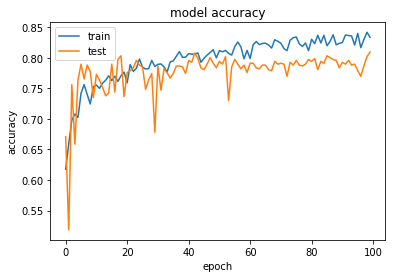

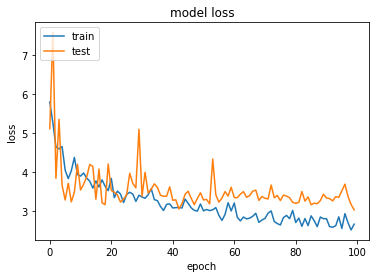

In [10]:
plot_history(model_history)

## Healthy vs CMD

In [3]:
label_dict2 = {1: healthy_images, 0: cmd_files}

In [4]:
paths_HCMD, labels_HCMD = utils.get_paths_labels(label_dict2)
Counter([tuple(l) for l in labels_HCMD])

Found 3012 examples with label 0
Found 1540 examples with label 1


Counter({(0.0, 1.0): 1540, (1.0, 0.0): 3012})

In [5]:
batch_size = 16
target_size = (150, 150)

itrain_HCMD = it.ImageTraining(label_dict2)
traingen_HCMD, testgen_HCMD = itrain_HCMD.get_train_test_generators(batch_size=batch_size, target_size=target_size)

Found 3012 examples with label 0
Found 1540 examples with label 1
partitioning data with train size 3641 and test size 910


In [6]:
channels = 3
h,w = target_size
class_count = len(label_dict2.keys())

# model_HCMD = CNN_models.get_multiclass_CNN(class_count=class_count, input_shape=(h,w,channels))

In [7]:
output_train = 'serialized_objects/0808/outputtrain_HCMD.npy'
output_val = 'serialized_objects/0808/outputval_HCMD.npy'
labels = 'serialized_objects/0804/labels_HCMD.p'
train_batches = None
val_batches = None

pt.get_output_values(traingen_HCMD, testgen_HCMD, output_train, output_val,
                     labels, train_batches=train_batches, val_batches=val_batches)

loading vgg model...
image target size (150, 150) with batch size 16
running training examples through top model...
running model with 227 training batches and 3632 total samples
training labels shape: (3632, 2)
final shape of bottleneck_features_train: (3632, 4, 4, 512)
running validation examples through top model...
running model with 56 validation batches of data
final shape of bottleneck_features_validation: (896, 4, 4, 512)


In [8]:
full_model_json = 'serialized_objects/0808/model_object_HCMD.json'
weights_path = 'serialized_objects/0808/model_weights_HCMD.hd5'
epochs = 100


model_history = pt.train_top_model(full_model_json, weights_path, output_train, output_val, labels, epochs=epochs)

train top model
loaded 3632 training labels and 896 validation labels.
loading bottleneck_trian_npy...
loaded 3632 training data samples
loading bottleneck_val_npy...
loaded 896 validation data samples
fitting model...
Train on 3632 samples, validate on 896 samples
Epoch 1/100
3632/3632 [==============================] - 7s - loss: 5.4887 - acc: 0.6589 - val_loss: 5.3247 - val_acc: 0.6696
Epoch 2/100
3632/3632 [==============================] - 6s - loss: 5.4631 - acc: 0.6611 - val_loss: 5.3247 - val_acc: 0.6696
Epoch 3/100
3632/3632 [==============================] - 6s - loss: 5.4629 - acc: 0.6611 - val_loss: 5.3247 - val_acc: 0.6696
Epoch 4/100
3632/3632 [==============================] - 6s - loss: 5.4629 - acc: 0.6611 - val_loss: 5.3247 - val_acc: 0.6696
Epoch 5/100
3632/3632 [==============================] - 6s - loss: 4.5017 - acc: 0.7139 - val_loss: 2.8815 - val_acc: 0.8125
Epoch 6/100
3632/3632 [==============================] - 6s - loss: 2.8990 - acc: 0.8125 - val_loss: 3.3

['acc', 'loss', 'val_acc', 'val_loss']


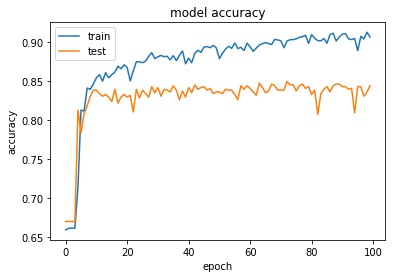

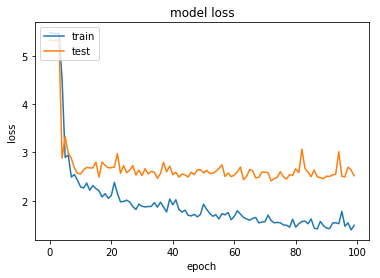

In [10]:
mplot.plot_history(model_history)

## Healthy vs CGM

In [11]:
label_dict3 = {1: healthy_images, 0: cgm_files}
paths_HCGM, labels_HCGM = utils.get_paths_labels(label_dict3)
Counter([tuple(l) for l in labels_HCGM])

Found 722 examples with label 0
Found 1540 examples with label 1


Counter({(0.0, 1.0): 1540, (1.0, 0.0): 722})

In [12]:
batch_size = 16
target_size = (150, 150)

itrain_HCGM = it.ImageTraining(label_dict3)
traingen_HCGM, testgen_HCGM = itrain_HCGM.get_train_test_generators(batch_size=batch_size, target_size=target_size)

Found 722 examples with label 0
Found 1540 examples with label 1
partitioning data with train size 1809 and test size 452


In [13]:
channels = 3
h,w = target_size
class_count = len(label_dict3.keys())

In [14]:
output_train = 'serialized_objects/0808/outputtrain_HCGM.npy'
output_val = 'serialized_objects/0808/outputval_HCGM.npy'
labels = 'serialized_objects/0804/labels_HCGM.p'


pt.get_output_values(traingen_HCGM, testgen_HCGM, output_train, output_val, labels)

loading vgg model...
image target size (150, 150) with batch size 16
running training examples through top model...
running model with 113 training batches and 1808 total samples
training labels shape: (1808, 2)
final shape of bottleneck_features_train: (1808, 4, 4, 512)
running validation examples through top model...
running model with 28 validation batches of data
final shape of bottleneck_features_validation: (448, 4, 4, 512)


In [17]:
full_model_json = 'serialized_objects/0808/model_object_HCGM.json'
weights_path = 'serialized_objects/0808/model_weights_HCGM.hd5'
epochs = 100


model_history = pt.train_top_model(full_model_json, weights_path, output_train, output_val, labels, epochs=epochs)

train top model
loaded 1808 training labels and 448 validation labels.
loading bottleneck_trian_npy...
loaded 1808 training data samples
loading bottleneck_val_npy...
loaded 448 validation data samples
fitting model...
Train on 1808 samples, validate on 448 samples
Epoch 1/100
1808/1808 [==============================] - 4s - loss: 5.1100 - acc: 0.6814 - val_loss: 5.4686 - val_acc: 0.6607
Epoch 2/100
1808/1808 [==============================] - 3s - loss: 5.0547 - acc: 0.6864 - val_loss: 5.4686 - val_acc: 0.6607
Epoch 3/100
1808/1808 [==============================] - 3s - loss: 5.0547 - acc: 0.6864 - val_loss: 5.4686 - val_acc: 0.6607
Epoch 4/100
1808/1808 [==============================] - 3s - loss: 5.0547 - acc: 0.6864 - val_loss: 5.4686 - val_acc: 0.6607
Epoch 5/100
1808/1808 [==============================] - 3s - loss: 5.0547 - acc: 0.6864 - val_loss: 5.4686 - val_acc: 0.6607
Epoch 6/100
1808/1808 [==============================] - 3s - loss: 5.0547 - acc: 0.6864 - val_loss: 5.4

['acc', 'loss', 'val_acc', 'val_loss']


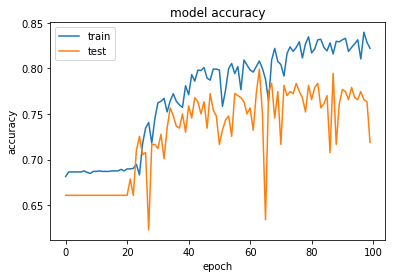

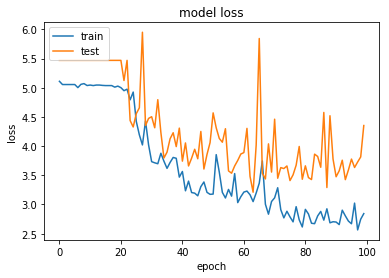

In [18]:
mplot.plot_history(model_history)

## Healthy vs CBB

In [3]:
label_dict4 = {1: healthy_images, 0: cbb_files}
paths_HCBB, labels_HCBB = utils.get_paths_labels(label_dict4)
Counter([tuple(l) for l in labels_HCBB])

Found 425 examples with label 0
Found 1540 examples with label 1


Counter({(0.0, 1.0): 1540, (1.0, 0.0): 425})

In [5]:
batch_size = 16
target_size = (150, 150)

itrain_HCBB = it.ImageTraining(label_dict4)
traingen_HCBB, testgen_HCBB = itrain_HCBB.get_train_test_generators(batch_size=batch_size, target_size=target_size)

Found 425 examples with label 0
Found 1540 examples with label 1
partitioning data with train size 1572 and test size 392


In [6]:
channels = 3
h,w = target_size
class_count = len(label_dict4.keys())

In [7]:
output_train = 'serialized_objects/0808/outputtrain_HCBB.npy'
output_val = 'serialized_objects/0808/outputval_HCBB.npy'
labels = 'serialized_objects/0808/labels_HCBB.p'


pt.get_output_values(traingen_HCBB, testgen_HCBB, output_train, output_val, labels)

loading vgg model...
image target size (150, 150) with batch size 16
running training examples through top model...
running model with 98 training batches and 1568 total samples
training labels shape: (1568, 2)
final shape of bottleneck_features_train: (1568, 4, 4, 512)
running validation examples through top model...
running model with 24 validation batches of data
final shape of bottleneck_features_validation: (384, 4, 4, 512)


In [8]:
full_model_json = 'serialized_objects/0808/model_object_HCBB.json'
weights_path = 'serialized_objects/0808/model_weights_HCBB.hd5'
epochs = 100


model_history = pt.train_top_model(full_model_json, weights_path, output_train, output_val, labels, epochs=epochs)

train top model
loaded 1568 training labels and 384 validation labels.
loading bottleneck_trian_npy...
loaded 1568 training data samples
loading bottleneck_val_npy...
loaded 384 validation data samples
fitting model...
Train on 1568 samples, validate on 384 samples
Epoch 1/100
1568/1568 [==============================] - 3s - loss: 3.5411 - acc: 0.7793 - val_loss: 3.5258 - val_acc: 0.7812
Epoch 2/100
1568/1568 [==============================] - 2s - loss: 3.4642 - acc: 0.7851 - val_loss: 3.5258 - val_acc: 0.7812
Epoch 3/100
1568/1568 [==============================] - 2s - loss: 3.4642 - acc: 0.7851 - val_loss: 3.5258 - val_acc: 0.7812
Epoch 4/100
1568/1568 [==============================] - 2s - loss: 3.4642 - acc: 0.7851 - val_loss: 3.5258 - val_acc: 0.7812
Epoch 5/100
1568/1568 [==============================] - 3s - loss: 3.4642 - acc: 0.7851 - val_loss: 3.5258 - val_acc: 0.7812
Epoch 6/100
1568/1568 [==============================] - 3s - loss: 3.4642 - acc: 0.7851 - val_loss: 3.5

## Four Class Classification: Disease Types

In [11]:
label_dict5 = {0: cbb_files, 1: cbsd_files, 2: cgm_files, 3: cmd_files}

In [12]:
paths_DIS, labels_DIS = utils.get_paths_labels(label_dict5)
Counter([tuple(l) for l in labels_HCBB])

Found 425 examples with label 0
Found 1751 examples with label 1
Found 722 examples with label 2
Found 3012 examples with label 3


Counter({(0.0, 1.0): 1540, (1.0, 0.0): 425})

In [13]:
batch_size = 16
target_size = (150, 150)

itrain_DIS = it.ImageTraining(label_dict5)
traingen_DIS, testgen_DIS = itrain_DIS.get_train_test_generators(batch_size=batch_size, target_size=target_size)

Found 425 examples with label 0
Found 1751 examples with label 1
Found 722 examples with label 2
Found 3012 examples with label 3
partitioning data with train size 4728 and test size 1181


In [14]:
output_train = 'serialized_objects/0808/outputtrain_DIS.npy'
output_val = 'serialized_objects/0808/outputval_DIS.npy'
labels = 'serialized_objects/0808/labels_DIS.p'


pt.get_output_values(traingen_DIS, testgen_DIS, output_train, output_val, labels)

loading vgg model...
image target size (150, 150) with batch size 16
running training examples through top model...
running model with 295 training batches and 4720 total samples
training labels shape: (4720, 4)
final shape of bottleneck_features_train: (4720, 4, 4, 512)
running validation examples through top model...
running model with 73 validation batches of data
final shape of bottleneck_features_validation: (1168, 4, 4, 512)


In [16]:
full_model_json = 'serialized_objects/0808/model_object_DIS.json'
weights_path = 'serialized_objects/0808/model_weights_DIS.hd5'
num_classes = len(label_dict5.keys())
epochs = 100


model_history = pt.train_top_model(full_model_json, weights_path, output_train,
                                   output_val, labels, epochs=epochs, num_classes=num_classes)

train top model
loaded 4720 training labels and 1168 validation labels.
loading bottleneck_trian_npy...
loaded 4720 training data samples
loading bottleneck_val_npy...
loaded 1168 validation data samples
fitting model...
Train on 4720 samples, validate on 1168 samples
Epoch 1/100
4720/4720 [==============================] - 9s - loss: 11.3742 - acc: 0.2919 - val_loss: 11.2606 - val_acc: 0.3014
Epoch 2/100
4720/4720 [==============================] - 8s - loss: 7.4253 - acc: 0.5324 - val_loss: 5.5469 - val_acc: 0.6515
Epoch 3/100
4720/4720 [==============================] - 8s - loss: 5.3252 - acc: 0.6640 - val_loss: 5.3710 - val_acc: 0.6618
Epoch 4/100
4720/4720 [==============================] - 8s - loss: 4.8801 - acc: 0.6926 - val_loss: 6.3264 - val_acc: 0.6070
Epoch 5/100
4720/4720 [==============================] - 8s - loss: 4.8508 - acc: 0.6951 - val_loss: 5.0922 - val_acc: 0.6824
Epoch 6/100
4720/4720 [==============================] - 8s - loss: 4.8723 - acc: 0.6936 - val_loss

['acc', 'loss', 'val_acc', 'val_loss']


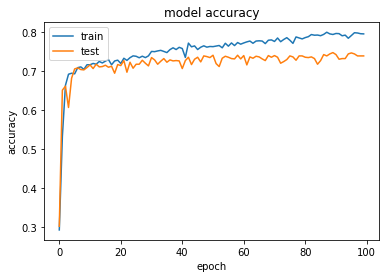

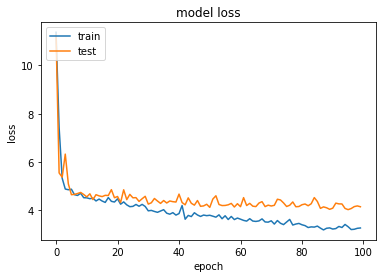

In [17]:
mplot.plot_history(model_history)